[Download Dataset](https://www.kaggle.com/kaggle/sf-salaries)

# SF Salaries
## Explore San Francisco city employee salary data


One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

(opens in a new tab)">salary distribution

Exploration Ideas
To help get you started, here are some data exploration ideas:

How have salaries changed over time between different groups of people?
How are base pay, overtime pay, and benefits allocated between different groups?
Is there any evidence of pay discrimination based on gender in this dataset?
How is budget allocated based on different groups and responsibilities?
Have other ideas you're curious for someone else to explore? Post them in this forum thread.

Data Description
sf-salaries-release-*.zip (downloadable via the "Download Data" link in the header above) contains a CSV table and a SQLite database (with the same data as the CSV file). Here's the code that creates this data release.

The original source for this data is here. We've taken the raw files here and combined/normalized them into a single CSV file as well as a SQLite database with an equivalently-defined table.

Please excuse anything that doesn't make "Real-World" sense in the dataframe,

Also note that all of these questions can be answered with one line of code.
____
###  Import pandas and read in the salary dataset csv file and set it to a DataFrame called ecom. **

In [650]:
import pandas as pd
import numpy as np
import warnings

In [651]:
warnings.filterwarnings('ignore')

In [652]:
df=pd.read_csv('Salaries.csv')

In [653]:
df_copy=df.copy()

### 1.Display Top 10 Rows of The Dataset

In [654]:
df.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


### 2. Check Last 10 Rows of The Dataset

In [655]:
df.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [656]:
#TotalPay=BasePay+OvertimePay+OtherPay
#TotalPayBenefits=Benefits+TotalPay

### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [657]:
df.shape #9 features

(148654, 13)

In [658]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

### 4. Getting Information About Our Dataset Like Total Number Rows,
### Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [659]:
df.info()  #OvertimePay object
           #OtherPay    object
           #Benefits    object
           #Year         int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [660]:
type(df.loc[8,'OvertimePay']) #That means not all values in the 'OvertimePay' column are str.

float

In [661]:
type(df.loc[148646,'OtherPay']) #The value that makes the column type  object is "Not Provided"

str

### 5.Check Null Values In The Dataset

In [662]:
df.isnull().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,605
OvertimePay,0
OtherPay,0
Benefits,36159
TotalPay,0
TotalPayBenefits,0
Year,0


In [663]:
#The "Notes" and "Status" columns mostly contain NaN values, making them not useful.

In [664]:
df[df['Benefits']=='Not Provided'].shape[0] # The "Benefits" column has 36,159 NaN values and 4 "Not Provided" values

4

### 6. Drop ID, Notes, Agency and Status Columns

In [665]:
colm=['Id','Notes','Agency','Status']
df.drop(columns=colm,inplace=True)


In [666]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [667]:
df.head(3)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011


### 7. Get Overall Statistics About The Dataframe

In [668]:
df.isnull().sum() #To check if the "year" column has any NaN values before converting it to a string.


,0
EmployeeName,0
JobTitle,0
BasePay,605
OvertimePay,0
OtherPay,0
Benefits,36159
TotalPay,0
TotalPayBenefits,0
Year,0


In [669]:
df['Year']=pd.to_numeric(df['Year'],errors='ignore').astype('string')

In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148049 non-null  object 
 3   OvertimePay       148654 non-null  object 
 4   OtherPay          148654 non-null  object 
 5   Benefits          112495 non-null  object 
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  string 
dtypes: float64(2), object(6), string(1)
memory usage: 10.2+ MB


In [671]:
df.describe()


,TotalPay,TotalPayBenefits
count,148654.000000,148654.000000
mean,74768.321972,93692.554811
std,50517.005274,62793.533483
min,-618.130000,-618.130000
25%,36168.995000,44065.650000
50%,71426.610000,92404.090000
75%,105839.135000,132876.450000
max,567595.430000,567595.430000


In [672]:
#There is a negative value ( define what it means)

#The mean and median are relatively close to each other

#A high standard deviation compared to the mean suggests potential outliers pulling the mean away from the median

#A quarter of the employees have a TotalPay less than 36,168.99

#A quarter of the employees have a TotalPayBenefits less than 44065.650000

#TotalPay
#Q3-Q1=
#105839-36168=69671
#Q2-Q1=
#71426-36168=35258
#Q3-max=
#105839-567595=-461756  #This indicates the presence of unusually high salaries compared to other employee

In [673]:
df[df['TotalPay']<0] # To check the negative values

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014


In [674]:
df[df['TotalPayBenefits']<0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
110528,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.00,-2.73,2013
110529,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.00,-8.20,2013
110530,David P Kucia,Police Officer 3,NaN,0.0,0.0,-33.89,0.00,-33.89,2013
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014


In [675]:
# OvertimePay object
# OtherPay    object
# Benefits    object
# BasePay     object
#To get the statistics for these columns, we will temporarily ignore the "Not Provided" values.

#OvertimePay
OvertimePay=pd.to_numeric(df['OvertimePay'],errors='coerce').round(0).astype('Int64')
OvertimePay.describe()


,OvertimePay
count,148650.0
mean,5066.060424
std,11454.381296
min,0.0
25%,0.0
50%,0.0
75%,4658.0
max,245132.0


In [676]:
# OtherPay
OtherPay=pd.to_numeric(df['OtherPay'],errors='coerce').round(0).astype('Int64')

OtherPay.describe()

,OtherPay
count,148650.0
mean,3648.766007
std,8056.601635
min,-7059.0
25%,0.0
50%,811.0
75%,4236.0
max,400184.0


In [677]:
d=pd.DataFrame(OtherPay,columns=['OtherPay'])#To deal with it as a DataFrame
d[d['OtherPay']<0] # To check the negative values



,OtherPay
84969,-7059
93200,-10
96168,-47
107184,-50
148653,-618


In [678]:
#Benefits
Benefits=pd.to_numeric(df['Benefits'],errors='coerce').round(0).astype('Int64')
Benefits.describe()

,Benefits
count,112491.0
mean,25007.893805
std,15402.217746
min,-34.0
25%,11535.5
50%,28629.0
75%,35567.0
max,96571.0


In [679]:
DF=pd.DataFrame(Benefits,columns=['Benefits'])#To deal with it as a DataFrame
DF[DF['Benefits']<0] # To check the negative values

,Benefits
110528,-3
110529,-8
110530,-34
144099,-14


In [680]:
#BasePay
BasePay=pd.to_numeric(df['BasePay'],errors='coerce').round(0).astype('Int64')
BasePay.describe()

,BasePay
count,148045.0
mean,66325.45495
std,42764.639451
min,-166.0
25%,33588.0
50%,65007.0
75%,94691.0
max,319275.0


In [681]:
DF=pd.DataFrame(BasePay,columns=['BasePay'])#To deal with it as a DataFrame
DF[DF['BasePay']<0] # To check the negative values

,BasePay
72832,-166
72865,-122
72872,-109
72874,-107
72878,-102
72884,-93
72888,-87
72894,-76
72908,-60
72920,-31


### 8. Find Occurrence of The Employee Names  (Top 5)

In [682]:
df['EmployeeName'].value_counts().iloc[0:5]


,count
EmployeeName,
Kevin Lee,13
William Wong,11
Richard Lee,11
Steven Lee,11
John Chan,9


### 9. Find The Number of Unique Job Titles

In [683]:
df['JobTitle'].nunique()

2159

### 10. Total Number of Job Titles Contain Captain

In [684]:
#way_1
l=[i for i in df['JobTitle'] if 'captain' in i.lower()]


In [685]:
len(l)

552

In [686]:
#way_2
df['JobTitle'].str.contains('Captain', case=False, na=False).sum()

np.int64(552)

### 11. Display All the Employee Names From Fire Department

In [687]:
df[df['JobTitle'].str.contains('Fire Department', case=False, na=False)]['EmployeeName']

,EmployeeName
4,PATRICK GARDNER
6,ALSON LEE
8,MICHAEL MORRIS
9,JOANNE HAYES-WHITE
10,ARTHUR KENNEY
...,...
32623,JAMES BARDEN
36162,Joanne Hayes-White
72926,Joanne M Hayes-White
102303,Robert E Evans


In [688]:
df[df['EmployeeName']=='Robert E Evans']['JobTitle'] #To check the results

,JobTitle
102303,"Captain, (Fire Department)"


### 12. Find Minimum, Maximum and Average BasePay

In [689]:
BasePay=pd.to_numeric(df['BasePay'],errors='coerce').round(0).astype('Int64')
Maximum=BasePay.max()
Minimum=BasePay.min()
Average=BasePay.mean()
print('Maximum :',Maximum,'\n'
      'Minimum : ',Minimum,'\n'
      'Average :',Average)

Maximum : 319275 
Minimum :  -166 
Average : 66325.4549495086


In [690]:
df.isnull().sum()

,0
EmployeeName,0
JobTitle,0
BasePay,605
OvertimePay,0
OtherPay,0
Benefits,36159
TotalPay,0
TotalPayBenefits,0
Year,0


### 13. Replace 'Not Provided' in EmployeeName' Column to NaN

In [691]:
df['EmployeeName'].isnull().sum() #Number of NaN values before replacing 'Not Provided'

np.int64(0)

In [692]:
df['EmployeeName']=df['EmployeeName'].replace('Not provided',np.nan)

In [693]:
df['EmployeeName'].isnull().sum()  #number of NaN after replacing 'Not Provided'

np.int64(4)

### 14. Drop The Rows Having 5 Missing Values

In [694]:
l=[df.isnull().sum(axis=1)] # Count the missing values in each row

In [695]:
s=l[0]
type(s)

pandas.core.series.Series

In [696]:
s

,0
0,1
1,1
2,1
3,1
4,1
...,...
148649,0
148650,1
148651,1
148652,1


In [697]:
length=len(s)
for i in range(length):
  if s[i]==5:
    print(i)
else:
  print('There are no rows with 5 missing values')

There are no rows with 5 missing values


### 15. Find Job Title of ALBERT PARDINI

In [698]:
df[df['EmployeeName']=='ALBERT PARDINI']['JobTitle']

,JobTitle
2,CAPTAIN III (POLICE DEPARTMENT)


In [699]:
df[df['EmployeeName'].str.contains('ALBERT PARDINI',case=False, na=False)]['JobTitle']

,JobTitle
2,CAPTAIN III (POLICE DEPARTMENT)
36519,Captain 3


### 16. How Much ALBERT PARDINI Make (Include Benefits) ?

In [700]:
df[df['EmployeeName'].str.contains('ALBERT PARDINI',case=False, na=False)]['Benefits']

,Benefits
2,NaN
36519,46326.21


In [701]:
df[df['EmployeeName']=='ALBERT PARDINI']['Benefits']

,Benefits
2,NaN


### 17. Display Name of The Person Having The Highest BasePay

In [702]:
df_2=df.copy() #Copy the data to temporarily change the 'BasePay' data type.

In [703]:
df_2['BasePay']=pd.to_numeric(df_2['BasePay'],errors='coerce').round(0).astype('Int64')

In [704]:
df_2['BasePay'].max()

np.int64(319275)

In [705]:
df_2[df_2['BasePay']==319275]['EmployeeName']

,EmployeeName
72925,Gregory P Suhr


### 18. Find Average BasePay of All Employee Per Year

In [706]:
df_2['Year']=pd.to_numeric(df_2['Year'],errors='coerce').astype('string')

In [707]:
df_2.groupby(['Year','EmployeeName'])['BasePay'].mean()

Year  EmployeeName          
2011  A BERNARD FATOOH          19969.0
      A ELIZABETH MARCHASIN     23592.0
      A JAMIL NIAZI             69058.0
      A. JAMES ROBERTSON II      9464.0
      AARIC PINGREE             36418.0
                                 ...   
2014  Zulema G Gutierrez        52153.0
      Zulma V Merino-Fuentes    29719.0
      Zun Jin Zhang He          53732.0
      Zuna T Luu                54703.0
      Zuri Jones                66668.0
Name: BasePay, Length: 141060, dtype: Float64

### 19. Find Average BasePay of All Employee Per JobTitle

In [708]:
Average_BasePay=df_2.groupby(['JobTitle','EmployeeName'])['BasePay'].mean()

In [709]:
Average_BasePay

JobTitle            EmployeeName   
ACCOUNT CLERK       ALICE BRONSON      43418.0
                    ALISHA WILLIS      11247.0
                    AMADO LUMAS JR     49778.0
                    ANA VILAR UY       49741.0
                    ANNA BOYD          49689.0
                                        ...   
Youth Comm Advisor  Mario R Yedidia    13916.0
                    Mario Yedidia      57545.0
                    Phimy  Truong      52434.0
                    Phimy Truong       32417.0
ZOO CURATOR         MYRON SULAK        43148.0
Name: BasePay, Length: 119697, dtype: Float64

### 20. Find Average BasePay of Employee Having Job Title ACCOUNTANT

In [710]:
Average_BasePay.loc['ACCOUNT CLERK']

,BasePay
EmployeeName,
ALICE BRONSON,43418.0
ALISHA WILLIS,11247.0
AMADO LUMAS JR,49778.0
ANA VILAR UY,49741.0
ANNA BOYD,49689.0
...,...
WILMA ESPINOSA,49778.0
WING YIN EST IP,43032.0
WINNIE FUNG,49778.0


In [711]:
df_2[df_2['JobTitle'].str.contains('ACCOUNTANT',case=False,na=False)][['EmployeeName','BasePay']]

,EmployeeName,BasePay
7444,VICTORIA SANTOS,107382
7686,CAROLYN LEW,109159
7687,KAN HTUN,109158
8158,EDUARDO LIM,106492
8162,FLORDELIZA LEVISTE,106492
...,...,...
143492,Theodore N Wong,12020
143766,Victoria L Santos,10967
144811,Violeta M Mosuela,7836
146288,Dee P Ngo,3087


### 21. Find Top 5 Most Common Jobs

In [712]:
Common_Jobs=df['JobTitle'].value_counts()

In [713]:
Common_Jobs

,count
JobTitle,
Transit Operator,7036
Special Nurse,4389
Registered Nurse,3736
Public Svc Aide-Public Works,2518
Police Officer 3,2421
...,...
Light Rail Vehicle Equip Eng,1
Civil Case Settlmnt Specialist,1
"ADMINISTRATOR, SFGH MEDICAL CENTER",1


In [714]:
Common_Jobs.head()

,count
JobTitle,
Transit Operator,7036
Special Nurse,4389
Registered Nurse,3736
Public Svc Aide-Public Works,2518
Police Officer 3,2421


In [715]:
df_2['OvertimePay']=pd.to_numeric(df_2['OvertimePay'],errors='coerce').round(0).astype('Int64')

In [716]:
df_2['OtherPay']=pd.to_numeric(df_2['OtherPay'],errors='coerce').round(0).astype('Int64')

In [717]:
df_2['Benefits']=pd.to_numeric(df_2['Benefits'],errors='coerce').round(0).astype('Int64')

# visualization

How have salaries changed over time between different groups of people?

In [718]:
import seaborn as sns
import matplotlib.pyplot as plt

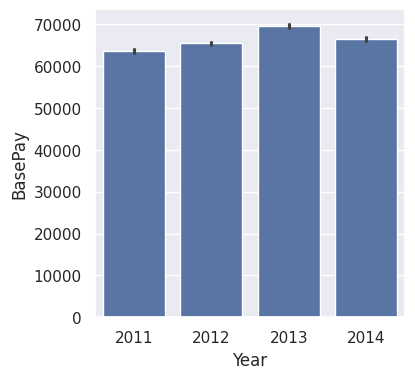

In [719]:
plt.figure(figsize=(4,4))
sns.barplot(x=df['Year'],y=df_2['BasePay'])
plt.show()

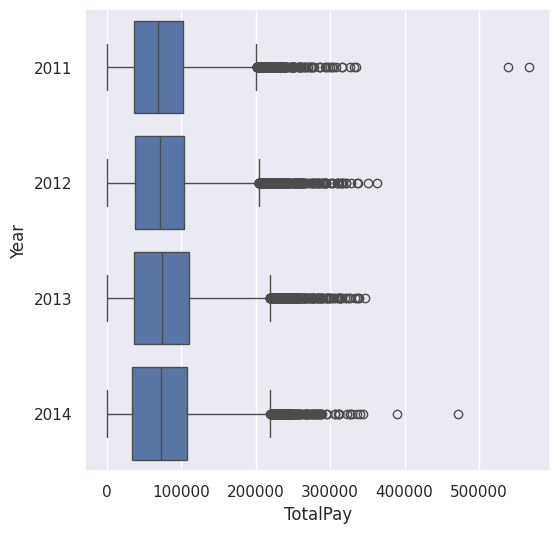

In [720]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df_2['TotalPay'],y=df_2['Year'])
plt.show()

How are base pay, overtime pay, and benefits allocated between different groups?

In [721]:
df_2['JobTitle'].nunique()

2159

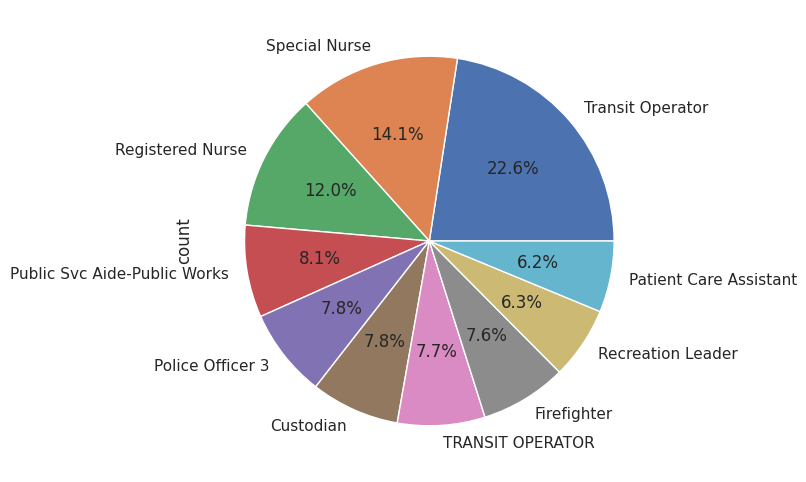

In [722]:
plt.figure(figsize=(6,6))
df_2['JobTitle'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.show()

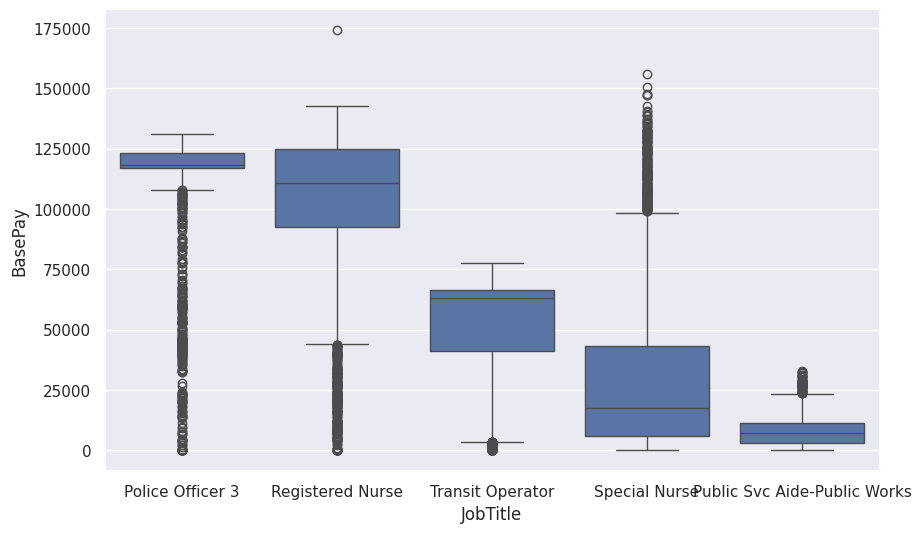

In [723]:
top_jobs=df_2['JobTitle'].value_counts().index[:5]
df_filtered=df_2[df_2['JobTitle'].isin(top_jobs)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['JobTitle'], y=df_filtered['BasePay'])
plt.show()


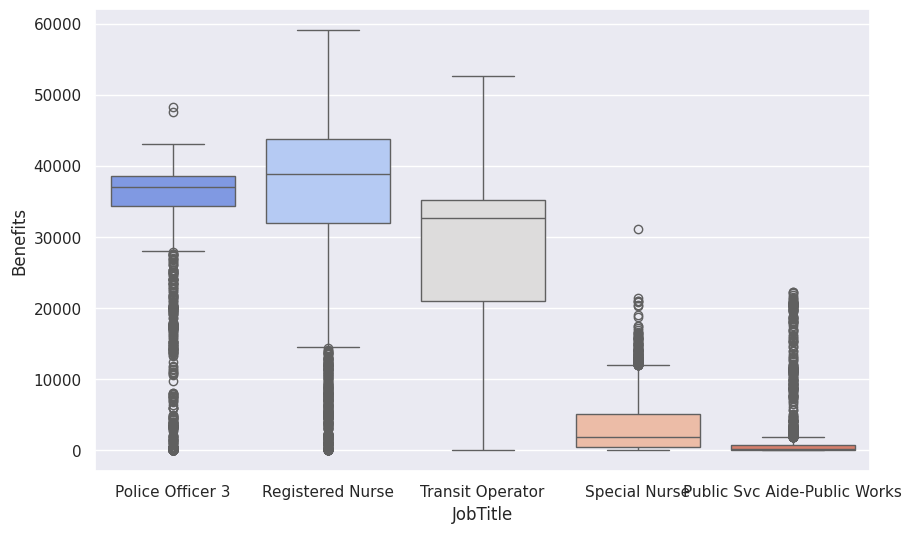

In [724]:
top_jobs = df_2['JobTitle'].value_counts().index[:5]
df_filtered = df_2[df_2['JobTitle'].isin(top_jobs)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['JobTitle'], y=df_filtered['Benefits'], palette='coolwarm')
plt.show()

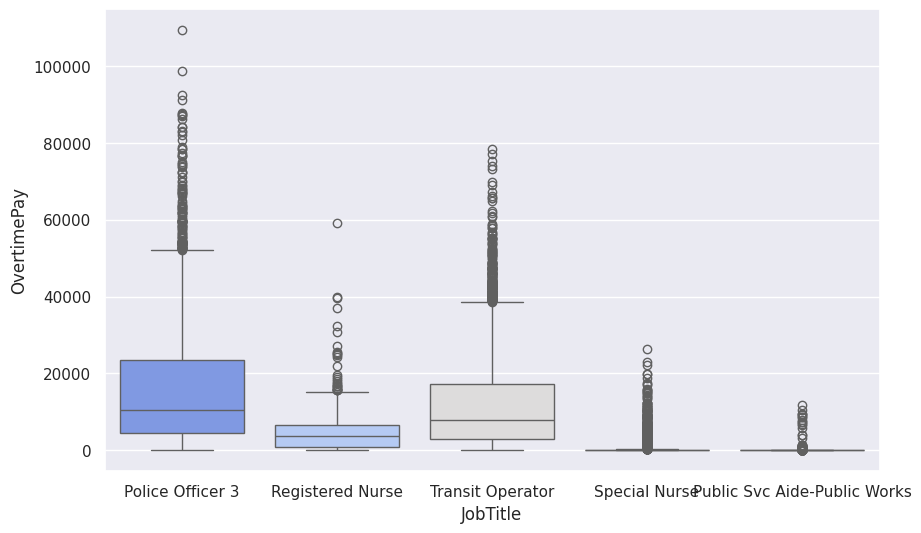

In [725]:
top_jobs =df_2['JobTitle'].value_counts().index[:5]
df_filtered=df_2[df_2['JobTitle'].isin(top_jobs)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['JobTitle'], y=df_filtered['OvertimePay'], palette='coolwarm')
plt.show()

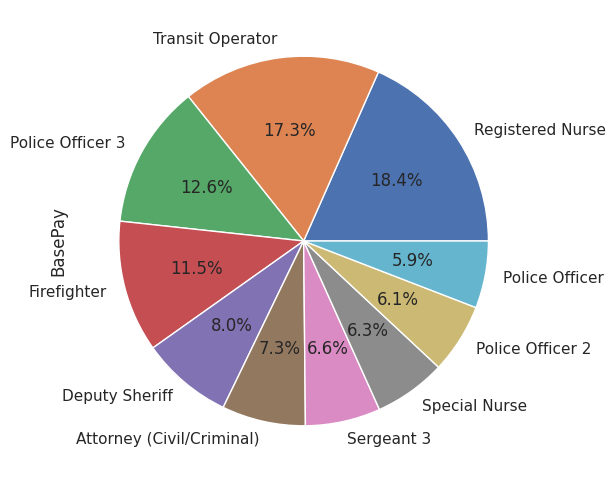

In [726]:
plt.figure(figsize=(6,6))
df_2.groupby('JobTitle')['BasePay'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%')

plt.show()


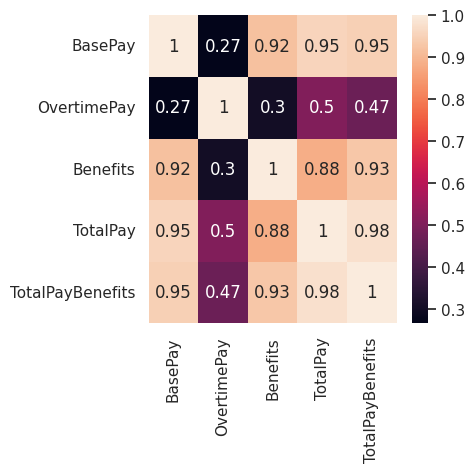

In [727]:
columns = ['BasePay', 'OvertimePay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
correlation_matrix = df_2[columns].corr()
plt.figure(figsize=(4,4))
sns.heatmap(correlation_matrix,annot=True)

plt.show()

In [728]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

<Axes: xlabel='Benefits', ylabel='Count'>

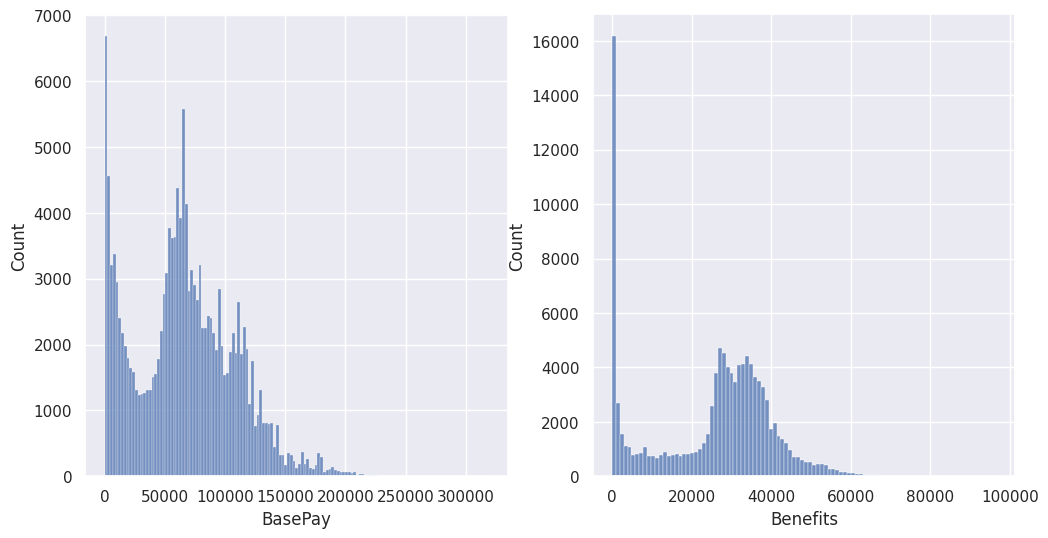

In [729]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.histplot(df_2['BasePay'],ax=axs[0])
sns.histplot(df_2['Benefits'],ax=axs[1])


<Axes: xlabel='OvertimePay', ylabel='Count'>

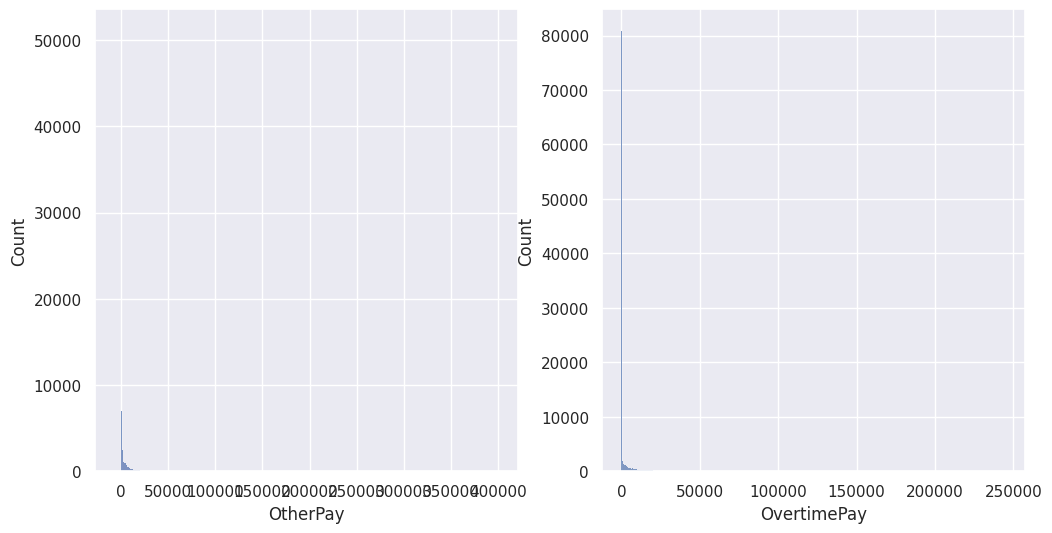

In [730]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.histplot(df_2['OtherPay'],ax=axs[0])
sns.histplot(df_2['OvertimePay'],ax=axs[1])

<Axes: xlabel='TotalPayBenefits', ylabel='Count'>

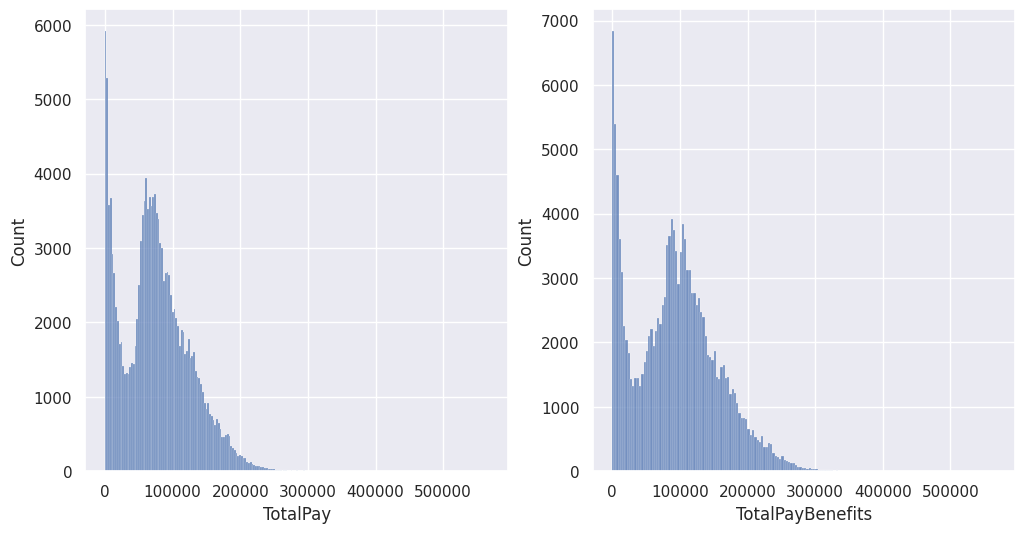

In [731]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.histplot(df_2['TotalPay'],ax=axs[0])
sns.histplot(df_2['TotalPayBenefits'],ax=axs[1])

#Preprocessing

In [732]:
from sklearn.impute import SimpleImputer

In [733]:
#Missing Values(NaN):Some salary values are missing and need to be handled.
#Non-Numeric Values("Not Provided"):Some entries contain "Not Provided,"which must be replaced or treated as missing data.
#Negative Values: Salaries cannot be negative, so these values should be removed or corrected

In [734]:
#Non-Numeric Values("Not Provided")
for i in df.columns:
  for j in df[i]:
    if j=='Not Provided':
      df[i]=df[i].replace('Not Provided',np.nan)

In [735]:
#Negative Values
num_column=["BasePay","OvertimePay","OtherPay", "Benefits" ,"TotalPay" ,"TotalPayBenefits"]
for i in num_column:
  if df[i].dtype=='object':
    df[i]=pd.to_numeric(df[i],errors='coerce').round(0).astype('Int64')

In [736]:
num_column=["BasePay","OvertimePay","OtherPay", "Benefits" ,"TotalPay" ,"TotalPayBenefits"]
for i in num_column:
  for j in df[i].dropna():
       if j<0:
        df[i]=df[i].replace(j,np.nan)

In [737]:
#Missing Values(NaN)
categorical=SimpleImputer(strategy='most_frequent')
df[["JobTitle"]]=categorical.fit_transform(df[['JobTitle']])


In [738]:
numeric_column=["TotalPay", "TotalPayBenefits"]
numeric=SimpleImputer(strategy='median')
df[numeric_column]=numeric.fit_transform(df[numeric_column])

In [739]:
df[['BasePay',"OvertimePay","OtherPay"]]=df[['BasePay','OvertimePay','OtherPay']].interpolate(method='linear')


In [781]:
#Benefits=TotalPayBenefits-BasePay-OvertimePay-OtherPay

for i in range(len(df)):
  if pd.isna(df['Benefits'][i]) :
   df['Benefits'][i]=int(df['TotalPayBenefits'][i]-df['BasePay'][i]-df['OvertimePay'][i]-df['OtherPay'][i])

In [741]:
df.isnull().sum()

,0
EmployeeName,6
JobTitle,0
BasePay,0
OvertimePay,0
OtherPay,0
Benefits,0
TotalPay,0
TotalPayBenefits,0
Year,0


In [742]:
df.drop(columns=['Year','EmployeeName'],inplace=True)

#Encoder

In [743]:
#!pip install category_encoders

In [744]:
import category_encoders as ce

In [745]:
code=ce.TargetEncoder(cols=["JobTitle"])

In [746]:
df["JobTitle"]=code.fit_transform(df["JobTitle"],df['TotalPayBenefits'])

In [747]:
df["JobTitle"]

,JobTitle
0,137032.848207
1,193543.268111
2,193543.268111
3,105587.882829
4,122373.764154
...,...
148649,68184.714036
148650,77956.000654
148651,77956.000654
148652,77956.000654


#Transformation

In [748]:
df_copy_1=df.copy()
df_copy_2=df.copy()


In [749]:
df.columns

Index(['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits',
       'TotalPay', 'TotalPayBenefits'],
      dtype='object')

In [750]:
#log
df_copy_1.OvertimePay=np.log1p(df_copy_1.OvertimePay)
df_copy_1.BasePay=np.log1p(df_copy_1.BasePay)
df_copy_1.OtherPay=np.log1p(df_copy_1.OtherPay)
df_copy_1.Benefits=np.log1p(df_copy_1.Benefits)
df_copy_1.TotalPay=np.log1p(df_copy_1.TotalPay)
df_copy_1.TotalPayBenefits=np.log1p(df_copy_1.TotalPayBenefits)


<Axes: xlabel='Benefits', ylabel='Count'>

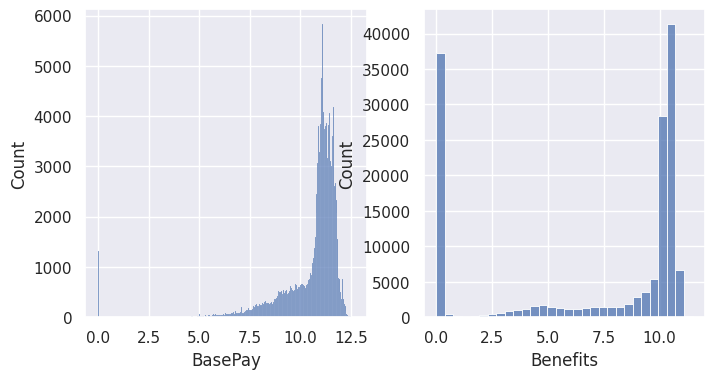

In [751]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,2,figsize=(8,4))
sns.histplot(df_copy_1['BasePay'],ax=axs[0])
sns.histplot(df_copy_1['Benefits'],ax=axs[1])

<Axes: xlabel='OvertimePay', ylabel='Count'>

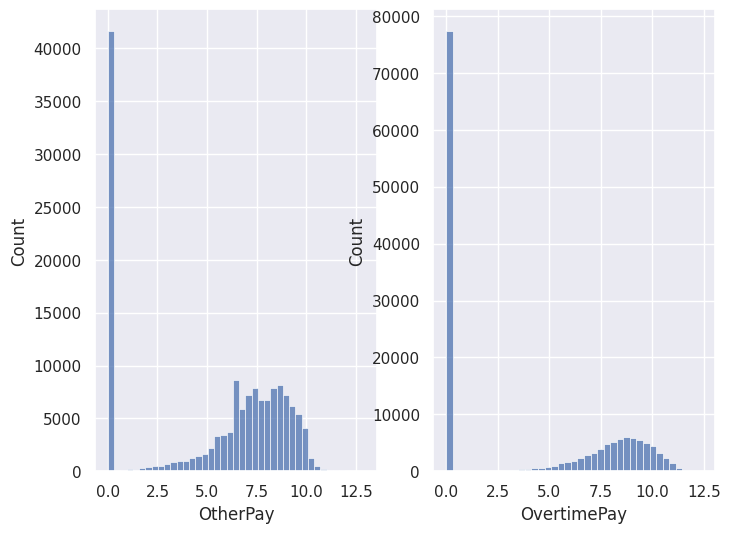

In [752]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,2,figsize=(8,6))
sns.histplot(df_copy_1['OtherPay'],ax=axs[0])
sns.histplot(df_copy_1['OvertimePay'],ax=axs[1])

<Axes: xlabel='TotalPayBenefits', ylabel='Count'>

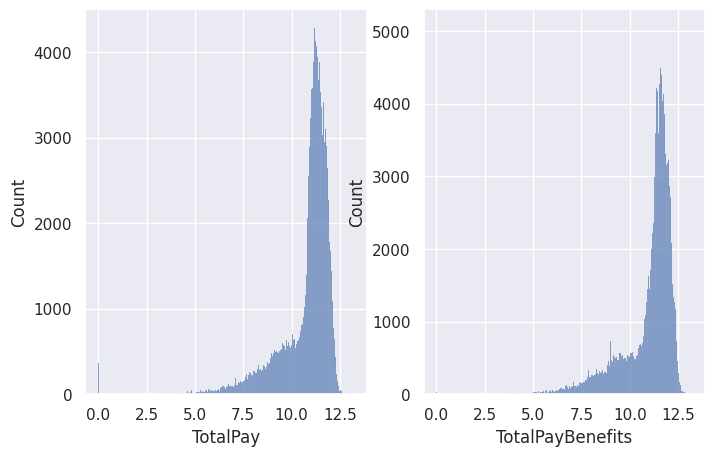

In [753]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,2,figsize=(8,5))
sns.histplot(df_copy_1['TotalPay'],ax=axs[0])
sns.histplot(df_copy_1['TotalPayBenefits'],ax=axs[1])

In [754]:
#The Square Root Transformation
for i in df.columns:
  df_copy_2[i]=np.sqrt(df_copy_2[i])

<Axes: xlabel='Benefits', ylabel='Count'>

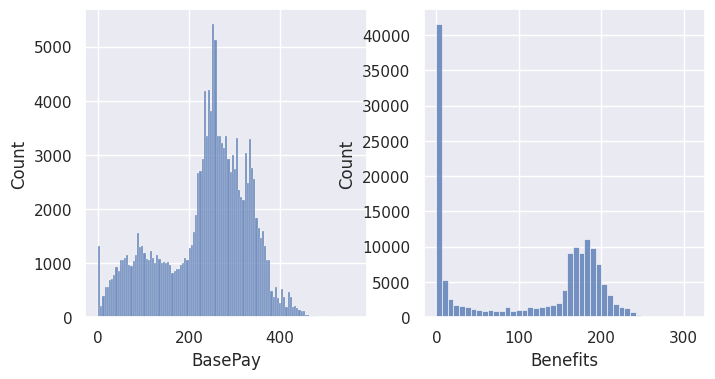

In [755]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,2,figsize=(8,4))
sns.histplot(df_copy_2['BasePay'],ax=axs[0])
sns.histplot(df_copy_2['Benefits'],ax=axs[1])

<Axes: xlabel='OvertimePay', ylabel='Count'>

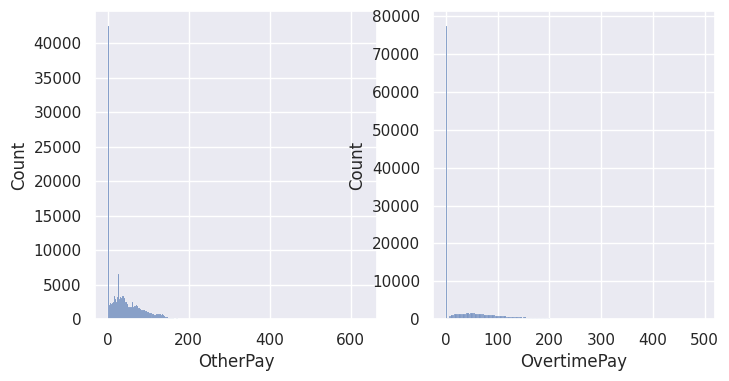

In [756]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,2,figsize=(8,4))
sns.histplot(df_copy_2['OtherPay'],ax=axs[0])
sns.histplot(df_copy_2['OvertimePay'],ax=axs[1])

<Axes: xlabel='TotalPayBenefits', ylabel='Count'>

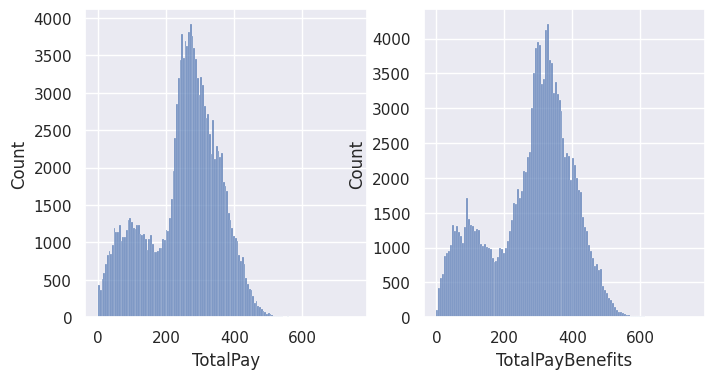

In [757]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,2,figsize=(8,4))
sns.histplot(df_copy_2['TotalPay'],ax=axs[0])
sns.histplot(df_copy_2['TotalPayBenefits'],ax=axs[1])

In [758]:
""" 'OvertimePay', 'OtherPay'....log
'Benefits', 'TotalPay','BasePay','TotalPayBenefits'.... sqrt"""

" 'OvertimePay', 'OtherPay'....log\n'Benefits', 'TotalPay','BasePay','TotalPayBenefits'.... sqrt"

In [759]:
sqrt_columns=['Benefits','TotalPay','BasePay','TotalPayBenefits']
for i in df.columns:
  if i in sqrt_columns:
    df[i]=np.sqrt(df[i])
  else:
     df[i]=np.log1p(df[i])

#Scaling


In [760]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [761]:
df_copy_1=df.copy()
df_copy_2=df.copy()

In [762]:
#MinMaxScaler
scale_columns=['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay','TotalPayBenefits']
scale_1=MinMaxScaler()
df_copy_1[scale_columns]=scale_1.fit_transform(df_copy_1[scale_columns])

<Axes: xlabel='OtherPay', ylabel='Count'>

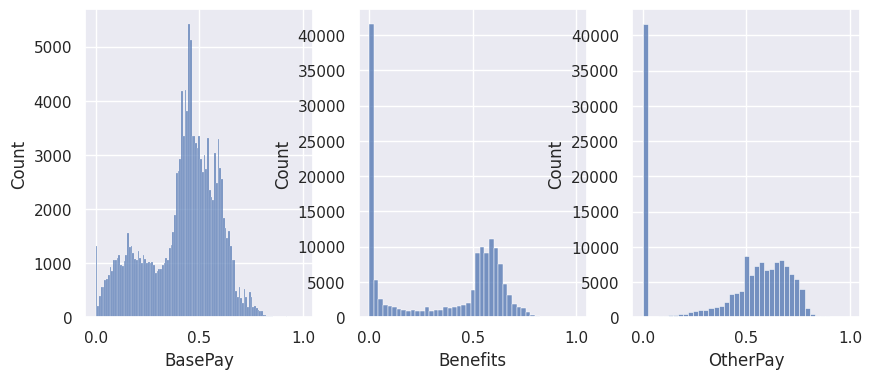

In [763]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))

sns.histplot(df_copy_1['BasePay'],ax=axs[0])
sns.histplot(df_copy_1['Benefits'],ax=axs[1])
sns.histplot(df_copy_1['OtherPay'],ax=axs[2])

<Axes: xlabel='TotalPay', ylabel='Count'>

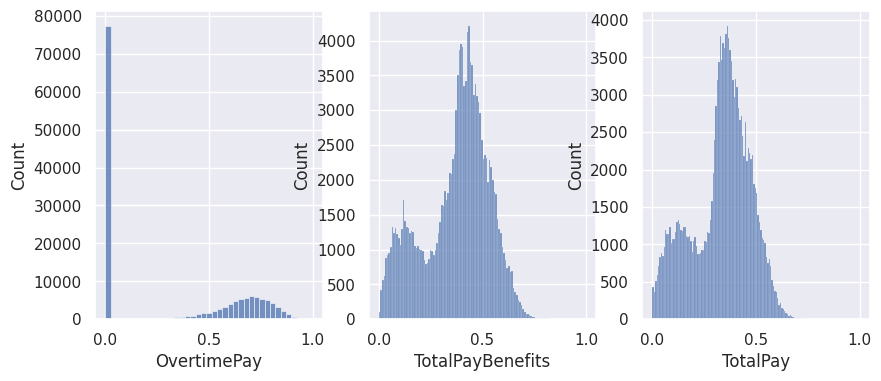

In [764]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))
sns.histplot(df_copy_1['OvertimePay'],ax=axs[0])
sns.histplot(df_copy_1['TotalPayBenefits'],ax=axs[1])
sns.histplot(df_copy_1['TotalPay'],ax=axs[2])

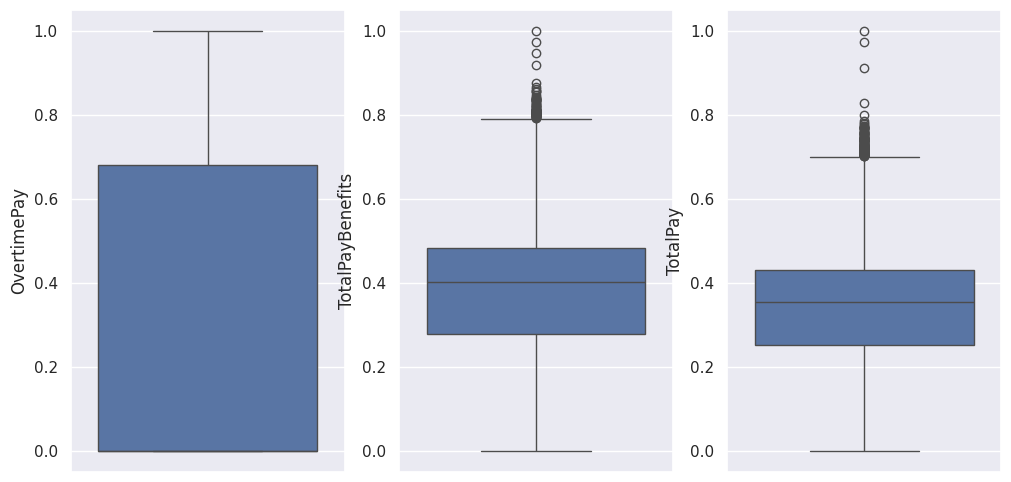

In [765]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(y=df_copy_1['OvertimePay'])
plt.subplot(1,3,2)
sns.boxplot(y=df_copy_1['TotalPayBenefits'])
plt.subplot(1,3,3)
sns.boxplot(y=df_copy_1['TotalPay'])

plt.show()

<Axes: ylabel='OtherPay'>

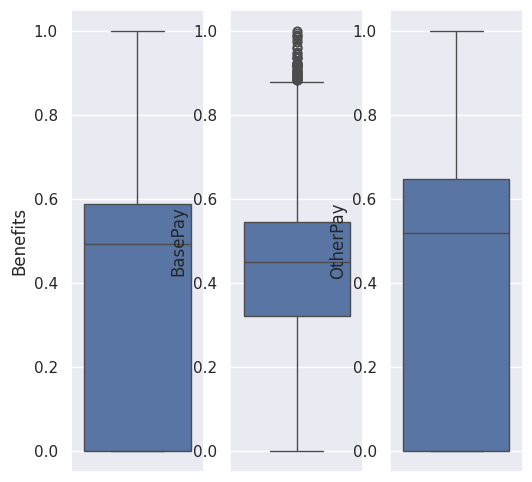

In [766]:
plt.figure(figsize=(12,6))
plt.subplot(1,6,4)
sns.boxplot(y=df_copy_1['Benefits'])
plt.subplot(1,6,5)
sns.boxplot(y=df_copy_1['BasePay'])
plt.subplot(1,6,6)
sns.boxplot(y=df_copy_1['OtherPay'])

In [767]:
#StandardScaler
scale_2=StandardScaler()
df_copy_2[scale_columns]=scale_2.fit_transform(df_copy_2[scale_columns])

<Axes: ylabel='OtherPay'>

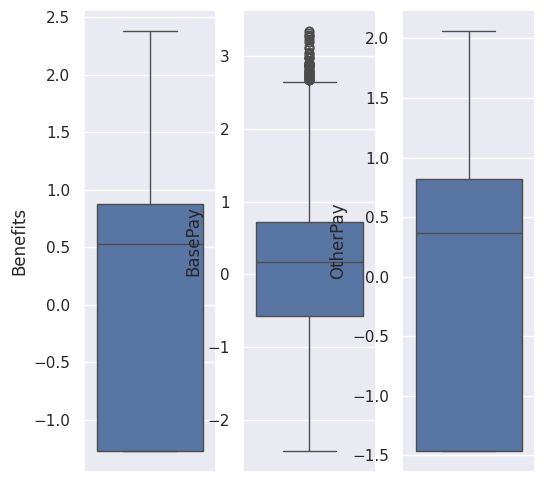

In [768]:
plt.figure(figsize=(12,6))
plt.subplot(1,6,4)
sns.boxplot(y=df_copy_2['Benefits'])
plt.subplot(1,6,5)
sns.boxplot(y=df_copy_2['BasePay'])
plt.subplot(1,6,6)
sns.boxplot(y=df_copy_2['OtherPay'])

<Axes: xlabel='OtherPay', ylabel='Count'>

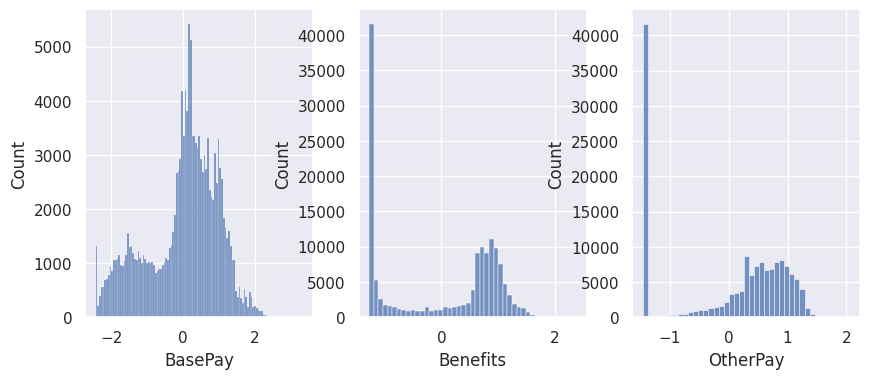

In [769]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))

sns.histplot(df_copy_2['BasePay'],ax=axs[0])
sns.histplot(df_copy_2['Benefits'],ax=axs[1])
sns.histplot(df_copy_2['OtherPay'],ax=axs[2])

<Axes: ylabel='TotalPay'>

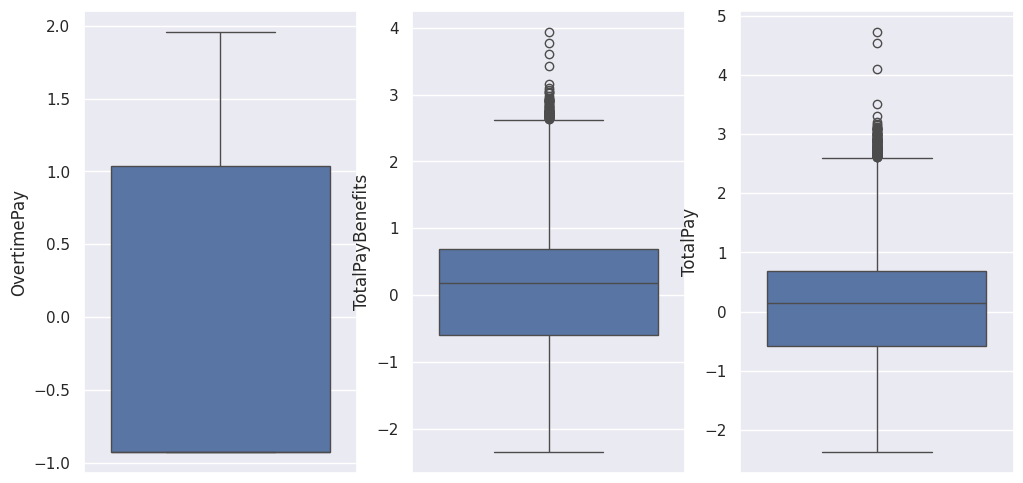

In [770]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(y=df_copy_2['OvertimePay'])
plt.subplot(1,3,2)
sns.boxplot(y=df_copy_2['TotalPayBenefits'])
plt.subplot(1,3,3)
sns.boxplot(y=df_copy_2['TotalPay'])

<Axes: xlabel='TotalPay', ylabel='Count'>

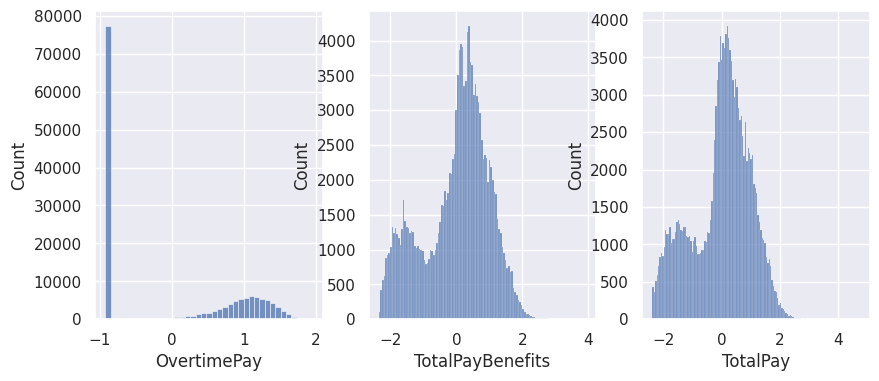

In [771]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))
sns.histplot(df_copy_2['OvertimePay'],ax=axs[0])
sns.histplot(df_copy_2['TotalPayBenefits'],ax=axs[1])
sns.histplot(df_copy_2['TotalPay'],ax=axs[2])

In [772]:
scale=MinMaxScaler()
df[scale_columns]=scale.fit_transform(df[scale_columns])

#Train and Test split

In [786]:
from sklearn.model_selection import train_test_split

In [787]:
x=df.drop(columns=['TotalPayBenefits']).values
y=df['TotalPayBenefits'].values

In [788]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #42,1,1600

#Models and Evaluate

In [791]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [793]:
def evaluate(y_test,y_pred):
  MAE=mean_absolute_error(y_test,y_pred)
  MSE=mean_squared_error(y_test,y_pred)
  RMSE=np.sqrt(MSE)
  R2=r2_score(y_test,y_pred)
  print('MAE:',MAE,'MSE:',MSE,'RMSE:',RMSE,'R2:',R2)

In [789]:
#LinearRegression
from sklearn.linear_model import LinearRegression
Alg_1=LinearRegression()
Alg_1.fit(x_train,y_train)
y_pred=Alg_1.predict(x_test)

In [794]:
evaluate(y_test,y_pred)

MAE: 0.004289633413521359 MSE: 6.807337614858439e-05 RMSE: 0.008250659134189486 R2: 0.9973393917985829


In [795]:
#Lasso
from sklearn.linear_model import Lasso
Alg_2=Lasso()
Alg_2.fit(x_train,y_train)
y_pred=Alg_2.predict(x_test)

In [796]:
evaluate(y_test,y_pred)

MAE: 0.12887878544366316 MSE: 0.025586534366576374 RMSE: 0.1599579143605479 R2: -3.4771787486675976e-05


In [797]:
#Ridge
from sklearn.linear_model import Ridge
Alg_3=Ridge()
Alg_3.fit(x_train,y_train)
y_pred=Alg_3.predict(x_test)

In [798]:
evaluate(y_test,y_pred)

MAE: 0.0043085098466915635 MSE: 6.806733101971999e-05 RMSE: 0.008250292783878642 R2: 0.9973396280689186
